# Profile & Project Details

1.   Name: Iva Raudyatuzzahra
2.   Email : ivaraudya@gmail.com
3.   Project: Netflix Closing Stock Price Prediction Model
4.   Dataset: https://www.kaggle.com/aayushmishra1512/netflix-stock-data/code



# Exploratory Data Analysis & Preprocessing

File Loading

In [2]:
import zipfile

local_zip = '/content/drive/MyDrive/Datasets/netflix-stock.zip'
zip_extract = zipfile.ZipFile(local_zip, 'r')
zip_extract.extractall('/content/')
zip_extract.close()

Importing Libraries

In [3]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

Data Reading

In [4]:
df = pd.read_csv('/content/NFLX.csv')
df = df.sort_values('Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4581 entries, 0 to 4580
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4581 non-null   object 
 1   Open       4581 non-null   float64
 2   High       4581 non-null   float64
 3   Low        4581 non-null   float64
 4   Close      4581 non-null   float64
 5   Adj Close  4581 non-null   float64
 6   Volume     4581 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 286.3+ KB


Missing Values Checking

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Drop Adj Close Feature

In [6]:
df.drop(['Adj Close'], axis=1, inplace=True)
df.sample()

,Date,Open,High,Low,Close,Volume
2299,2011-07-11,42.118572,43.07143,40.985714,41.534286,36917300


Data Visualization

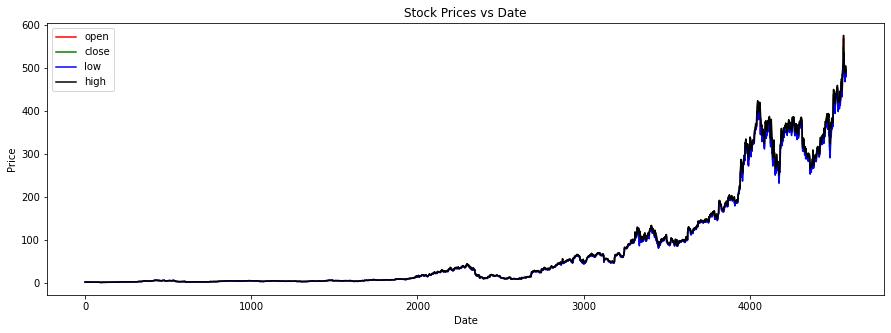

In [7]:
plt.figure(figsize=(15, 5));
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.Close.values, color='green', label='close')
plt.plot(df.Low.values, color='blue', label='low')
plt.plot(df.High.values, color='black', label='high')

plt.title('Stock Prices vs Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

Create New Dataframe

In [8]:
df_final = df.copy()
column_list = ['Date','Close']
df_final = df_final[column_list]
df_final['Date'] = pd.to_datetime(df_final['Date'])
df_final = df_final.set_index('Date')

df_final.sample()

,Close
Date,
2018-12-12,274.880005


In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4581 entries, 2002-05-23 to 2020-08-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4581 non-null   float64
dtypes: float64(1)
memory usage: 71.6 KB


Splitting Data

In [49]:
X = df_final.values
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 4581
Training Observations: 3664
Testing Observations: 917


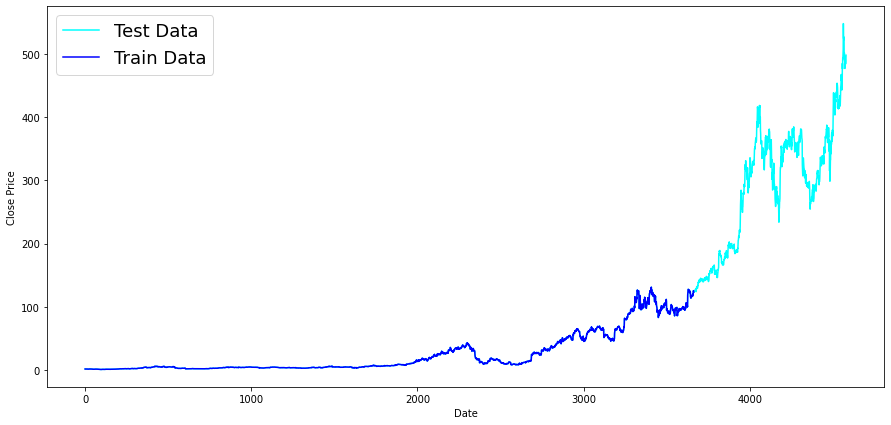

In [50]:
plt.figure(figsize = (15,7))
plt.plot(range(df_final.shape[0]),df_final,color='cyan', label='Test Data')
plt.plot(range(train.shape[0]),train,color='blue',label='Train Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

# Model Training

Data Normalization

In [52]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train)
scaled_train

array([[0.00630813],
       [0.00641208],
       [0.00600722],
       ...,
       [0.95128575],
       [0.95756652],
       [0.94109862]])

In [55]:
scaled_train.shape

(3664, 1)

In [56]:
train_data = scaled_train[0:train_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00630813, 0.00641208, 0.00600722, 0.00559689, 0.0053507 ,
       0.005389  , 0.00578838, 0.00570631, 0.00593063, 0.00619871,
       0.00571178, 0.00600176, 0.00597986, 0.00551483, 0.00543823,
       0.00469964, 0.00420725, 0.00411971, 0.00443156, 0.00447533,
       0.00464493, 0.00463946, 0.00453004, 0.00471605, 0.00437137,
       0.00479812, 0.00501696, 0.00612759, 0.00644491, 0.00692089,
       0.00614947, 0.00603458, 0.00605646, 0.00686618, 0.00639567,
       0.0058978 , 0.00577197, 0.00548747, 0.00594704, 0.00602911,
       0.00611117, 0.00592516, 0.00567896, 0.00508262, 0.0038188 ,
       0.0038571 , 0.00414707, 0.00444797, 0.00397199, 0.00310209,
       0.00308021, 0.00297078, 0.00322245, 0.00324434, 0.00317322,
       0.00294343, 0.00306379, 0.00352883, 0.00390634, 0.00413612])]
[0.004666814995083838]

[array([0.00630813, 0.00641208, 0.00600722, 0.00559689, 0.0053507 ,
       0.005389  , 0.00578838, 0.00570631, 0.00593063, 0.00619871,
       0.00571178, 0.00600176, 0.0

In [57]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3604, 60, 1)

Define Model Architecture

In [74]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, input_shape= (x_train.shape[1], 1), return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 60, 64)            16896     
_________________________________________________________________
lstm_19 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                330       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 52,341
Trainable params: 52,341
Non-trainable params: 0
_________________________________________________________________


In [75]:
class callbacks_now(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('mae') <= 0.1:
      print('Mean Absolute Error < 10%, training has been stopped.')
      self.model.stop_training = True

Train The Model

In [76]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(x_train, y_train, batch_size=64, epochs=100,  callbacks = [callbacks_now()])

Epoch 1/100
57/57 [==============================] - 8s 83ms/step - loss: 0.0401 - mae: 0.1643
Epoch 2/100
57/57 [==============================] - 5s 82ms/step - loss: 0.0350 - mae: 0.1510
Epoch 3/100
57/57 [==============================] - 5s 83ms/step - loss: 0.0313 - mae: 0.1495
Epoch 4/100
57/57 [==============================] - 5s 82ms/step - loss: 0.0289 - mae: 0.1508
Epoch 5/100
57/57 [==============================] - 5s 83ms/step - loss: 0.0272 - mae: 0.1529
Epoch 6/100
57/57 [==============================] - 5s 81ms/step - loss: 0.0259 - mae: 0.1551
Epoch 7/100
57/57 [==============================] - 5s 82ms/step - loss: 0.0250 - mae: 0.1571
Epoch 8/100
57/57 [==============================] - 5s 82ms/step - loss: 0.0244 - mae: 0.1588
Epoch 9/100
57/57 [==============================] - 5s 83ms/step - loss: 0.0239 - mae: 0.1600
Epoch 10/100
57/57 [==============================] - 5s 82ms/step - loss: 0.0235 - mae: 0.1613
Epoch 11/100
57/57 [=============================

Plot Loss

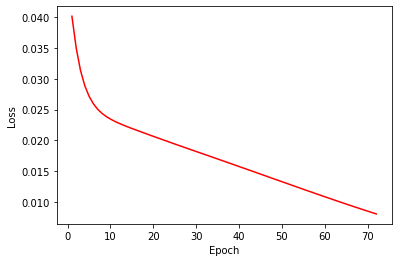

In [117]:
training_loss = history.history['loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();